In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../1d_fpr_2/1d_fpr_results.csv')
# drop the first column
df = df.drop(df.columns[0], axis=1)
df.head()

,true_beta_1,contamination_level,ctam_sigma,ctam_mu,cook_cutoff,ols_pr,ols_diag_pr,robust_m_pr,robust_mm_pr,robust_s_pr
0,0.00,0.4,0,0,4,0.070,0.105,0.085,0.085,0.060
1,0.00,0.4,1,0,4,0.055,0.085,0.060,0.080,0.075
2,0.00,0.4,2,0,4,0.050,0.080,0.050,0.040,0.070
3,0.02,0.4,0,0,4,0.025,0.100,0.025,0.050,0.050
4,0.02,0.4,1,0,4,0.050,0.075,0.045,0.050,0.070


In [3]:
df.columns

Index(['true_beta_1', 'contamination_level', 'ctam_sigma', 'ctam_mu',
       'cook_cutoff', 'ols_pr', 'ols_diag_pr', 'robust_m_pr', 'robust_mm_pr',
       'robust_s_pr'],
      dtype='object')

In [4]:
feature_columns = ['true_beta_1', 'contamination_level', 'ctam_sigma', 'ctam_mu', 'cook_cutoff']
pr_columns = ['ols_pr', 'ols_diag_pr', 'robust_m_pr', 'robust_mm_pr','robust_s_pr']

# melt the dataframe
df_pr = df.melt(id_vars=feature_columns, value_vars=pr_columns, var_name='method', value_name='pr')
df_pr['method'] = df_pr['method'].str.replace('_mspe', '')
df_pr.head()


,true_beta_1,contamination_level,ctam_sigma,ctam_mu,cook_cutoff,method,pr
0,0.00,0.4,0,0,4,ols_pr,0.070
1,0.00,0.4,1,0,4,ols_pr,0.055
2,0.00,0.4,2,0,4,ols_pr,0.050
3,0.02,0.4,0,0,4,ols_pr,0.025
4,0.02,0.4,1,0,4,ols_pr,0.050


In [5]:
df_pr.ctam_sigma.unique()

array([0, 1, 2])

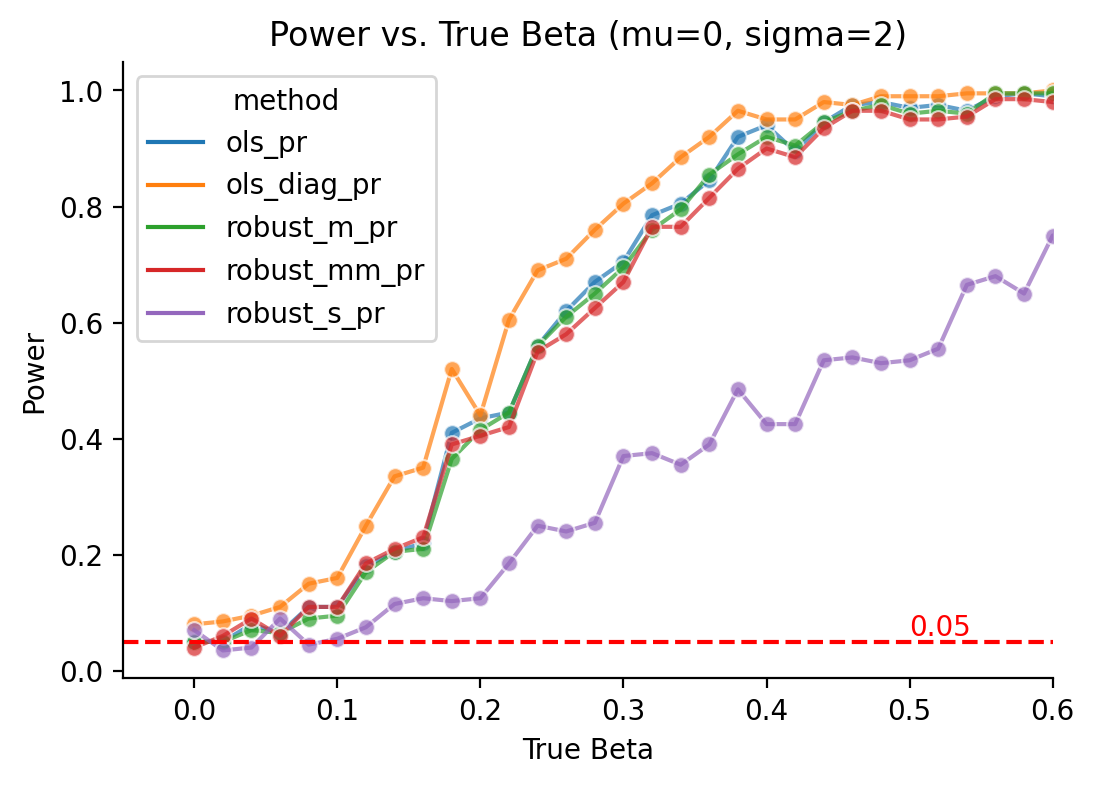

In [25]:
# filter by mu = 0, 
df_pr_mu0_sigma2 = df_pr[(df_pr['ctam_mu'] == 0) & (df_pr['ctam_sigma'].isin([2]))]

fig, ax = plt.subplots(figsize=(6, 4), dpi=200)
# facet by sigma plot for each method as hue
sns.lineplot(x='true_beta_1', y='pr', hue='method', data=df_pr_mu0_sigma2, marker='o', alpha=0.7)
# draw 0.05 line
plt.axhline(y=0.05, color='r', linestyle='--')
# annotate the 0.05 line
plt.text(0.5, 0.06, '0.05', color='red', fontsize=10)
plt.xlim(-0.05, 0.6)
plt.title('Power vs. True Beta (mu=0, sigma=2)')
plt.xlabel('True Beta')
plt.ylabel('Power')
sns.despine()
